# B Spline

- https://www.giassa.net/?page_id=274
- https://pages.mtu.edu/~shene/COURSES/cs3621/NOTES/
- https://pages.mtu.edu/~shene/COURSES/cs3621/NOTES/spline/B-spline/bspline-ex-1.html


In [1]:
from scipy.interpolate import BSpline
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd

In [2]:
k = 2
t = [0, 1, 2, 3, 4, 5, 6]
c = [-1, 2, 0, -1]

spl = BSpline(t,c,k)
spl(2)

array(0.5)

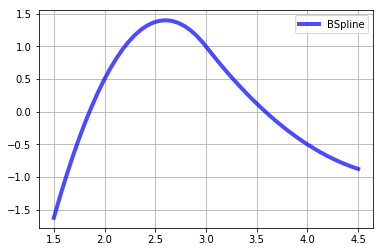

In [3]:
fig, ax = plt.subplots()

xx = np.linspace(1.5, 4.5, 50)

ax.plot(xx, spl(xx), 'b-', lw=4, alpha=0.7, label='BSpline')
ax.grid(True)
ax.legend()
plt.show()

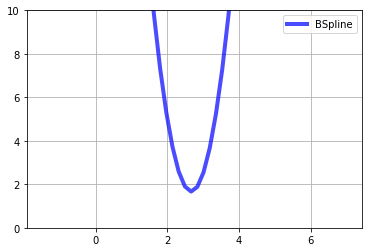

In [4]:
k = 2
t = [0, 1, 2, 3, 4, 5]
c = [10, 0, 5]

spl = BSpline(t,c,k)

fig, ax = plt.subplots()
ax.set_ylim([0, 10])

xx = np.linspace(-1.5, 7, 50)

ax.plot(xx, spl(xx), 'b-', lw=4, alpha=0.7, label='BSpline')
ax.grid(True)
ax.legend()
plt.show()

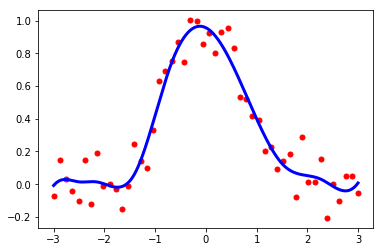

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
x = np.linspace(-3, 3, 50)
y = np.exp(-x**2) + 0.1 * np.random.randn(50)

spl = UnivariateSpline(x, y)
xs = np.linspace(-3, 3, 1000)




plt.plot(x, y, 'ro', ms=5)
#plt.plot(xs, spl(xs), 'g', lw=3)
spl.set_smoothing_factor(0.5)
plt.plot(xs, spl(xs), 'b', lw=3)
plt.show()

## Univariate Spline
- s = 0 => InterpolatedUnivariateSpline
- s approximates the curve
- Ref:
    - https://scicomp.stackexchange.com/questions/6971/scipy-interpolation-with-univariate-splines
    - https://math.stackexchange.com/questions/3179799/polynomial-interpolation-vs-polynomial-curve-fitting
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.InterpolatedUnivariateSpline.html#scipy.interpolate.InterpolatedUnivariateSpline

C:\Users\Admin\Anaconda3\lib\site-packages\scipy\interpolate\fitpack2.py:227: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


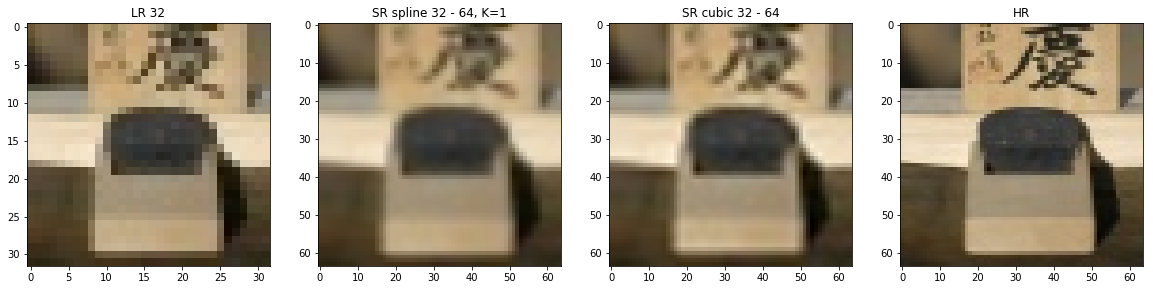

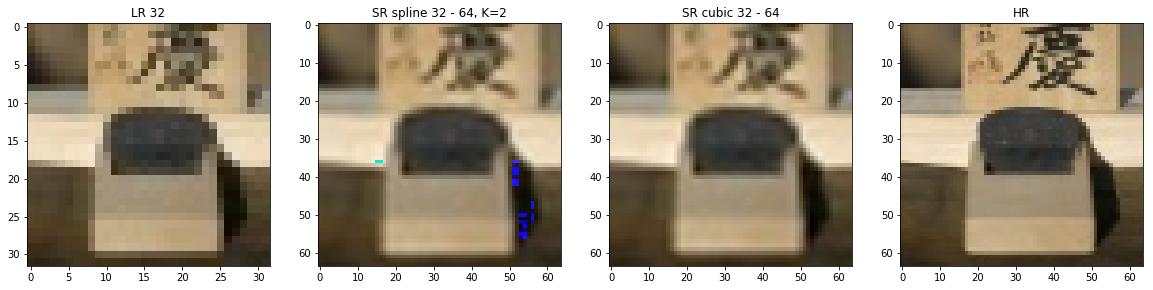

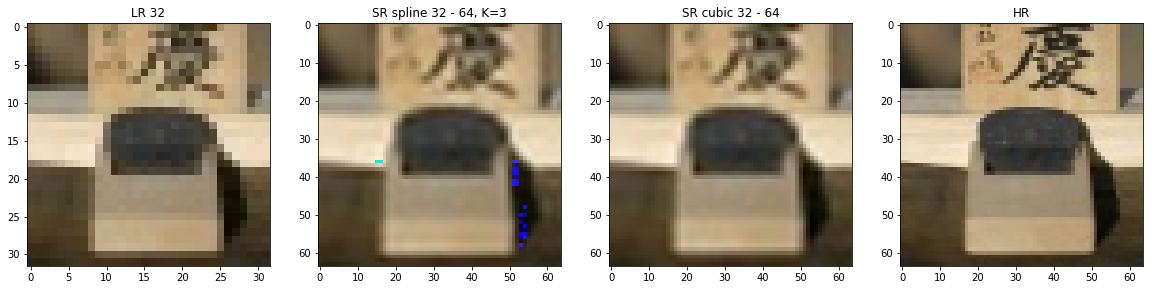

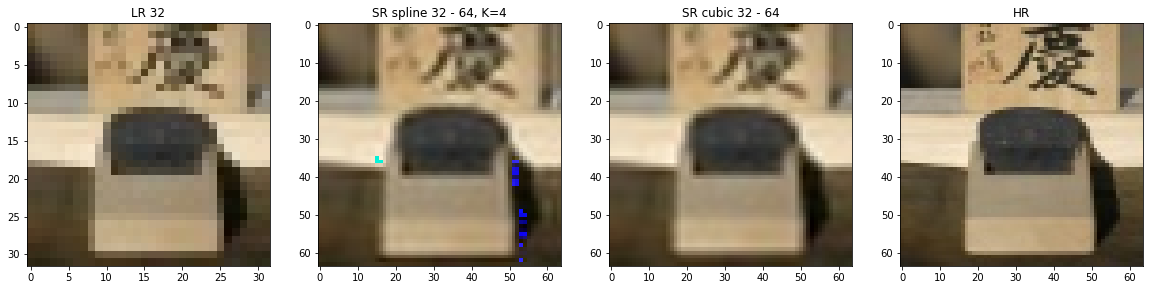

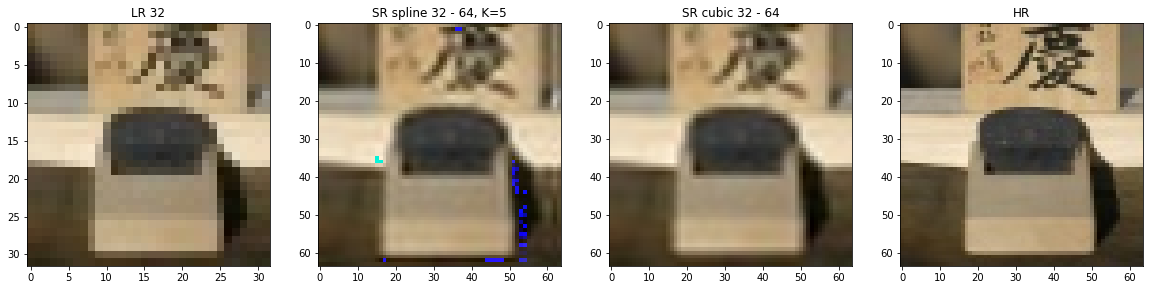

In [31]:
import numpy as np
from scipy.interpolate import SmoothBivariateSpline, UnivariateSpline

path = '../data/Imagenet32/val/I32_0.jpg'
hr_path = '../data/Imagenet64/val/I64_0.jpg'
lr_image = cv2.imread(path)
lr_image =cv2.cvtColor(lr_image, cv2.COLOR_RGB2BGR)

hr_image = cv2.imread(hr_path)
hr_image =cv2.cvtColor(hr_image, cv2.COLOR_RGB2BGR)


for tK in range(5):
    _K=tK+1
    dim = (lr_image.shape[0]*2, lr_image.shape[1]*2, 3)
    sr_image = np.zeros(dim, dtype=np.uint8)

    for (i,row) in enumerate(lr_image):
        len_row=len(row);
        for j in range(3):
            x = np.linspace(0,len_row-1,len_row)
            y=row[:,j]
            spl = UnivariateSpline(x, y, k=_K)
            spl.set_smoothing_factor(0)
            x=np.linspace(0,len_row-1,len_row*2)
            y=spl(x)
            sr_image[i,:,j]=y

    tem_image=sr_image[0:int(dim[0]/2),:,:]
    len_row=tem_image.shape[1]
    for i in range(len_row):
        column=tem_image[:,i,:];
        for j in range(3):
            x = np.linspace(0,tem_image.shape[0]-1,tem_image.shape[0])
            y=column[:,j]
            spl = UnivariateSpline(x, y, k=_K)
            spl.set_smoothing_factor(0)
            x=np.linspace(0,tem_image.shape[0]-1,tem_image.shape[0]*2)
            y=spl(x)
            sr_image[:,i,j]=y

    sr = cv2.resize(lr_image,(dim[0], dim[1]), interpolation=cv2.INTER_CUBIC)
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20, 20))
    ax1.imshow(lr_image)
    ax1.set_title("LR 32")
    ax2.imshow(sr_image)
    ax2.set_title("SR spline 32 - 64, K=" + str(_K))
    ax3.imshow(sr)
    ax3.set_title("SR cubic 32 - 64")
    ax4.imshow(hr_image)
    ax4.set_title("HR")

In [ ]:
print(sr_image[62][20])
print(sr[62][20])

print(sr_image[30][50])
print(sr[30][50])



# PSNR

In [16]:
def psnr(img1, img2):
    mse = np.mean( (img1 - img2) ** 2 )
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

# Comparison

../data/Imagenet32/val/I32_0.jpg


ValueError: Input images must have the same dimensions.

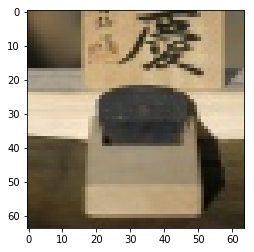

In [27]:
from skimage.measure import compare_psnr

path = '../../../btech2020sr/'
hr_path = '../data/Imagenet64/val/'

for i in range(5):
        print(path + 'I32_' + str(i) + '.jpg')
        lr_image = cv2.imread(path + 'I32_' + str(i) + '.jpg')
        lr_image =cv2.cvtColor(lr_image, cv2.COLOR_RGB2BGR)
       
        hr_image = cv2.imread(hr_path + 'I64_' + str(i) + '.jpg')
        hr_image =cv2.cvtColor(hr_image, cv2.COLOR_RGB2BGR)
        plt.imshow(hr_image)
        
        print(compare_psnr(lr_image, hr_image)) 

In [30]:
path = '../data/Imagenet32/val/I32_0.jpg'
hr_path = '../data/Imagenet32/val/I32_1.jpg'

lr_image = cv2.imread(path)
lr_image =cv2.cvtColor(lr_image, cv2.COLOR_RGB2BGR)
       
hr_image = cv2.imread(hr_path)
hr_image =cv2.cvtColor(hr_image, cv2.COLOR_RGB2BGR)

print(compare_psnr(lr_image, hr_image)) 

10.977981501326944
